In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_csv("TechJobTime.csv")

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ModuloMSP,16818.0,6.761030,5.381794,1.0,4.0,5.0,9.0,26.0
Site,16818.0,231.733262,140.652570,3.0,8.0,301.0,301.0,601.0
ModeID,16818.0,62.835236,178.309272,1.0,2.0,3.0,3.0,601.0
CategoryID,16818.0,255.404923,152.873253,1.0,301.0,301.0,301.0,901.0
TechID,16818.0,729.122607,2644.488200,17.0,105.0,694.0,694.0,35101.0
ChargeMinutes,16818.0,2475.839933,35386.155256,0.0,360.0,780.0,1800.0,2853120.0


In [ ]:
print(df.head())
print(df.shape)

   ModuloMSP  Site  ModeID  CategoryID  TechID  ChargeMinutes
0          1   301       3         301     105              0
1          2   301       3         301     694           1380
2          1   301       3         301     694            300
3          3   301       3         301     105            180
4          2     3       3         301     105            480
(16818, 6)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16818 entries, 0 to 16817
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ModuloMSP      16818 non-null  int64
 1   Site           16818 non-null  int64
 2   ModeID         16818 non-null  int64
 3   CategoryID     16818 non-null  int64
 4   TechID         16818 non-null  int64
 5   ChargeMinutes  16818 non-null  int64
dtypes: int64(6)
memory usage: 788.5 KB
None


In [ ]:
print(df.isnull().any())

ModuloMSP        False
Site             False
ModeID           False
CategoryID       False
TechID           False
ChargeMinutes    False
dtype: bool


In [ ]:
X = df[["ModuloMSP", "Site", "ModeID", "CategoryID"]]
print(X.shape)
print(X.describe().T.round(2))

(16818, 4)
              count    mean     std  min    25%    50%    75%    max
ModuloMSP   16818.0    6.76    5.38  1.0    4.0    5.0    9.0   26.0
Site        16818.0  231.73  140.65  3.0    8.0  301.0  301.0  601.0
ModeID      16818.0   62.84  178.31  1.0    2.0    3.0    3.0  601.0
CategoryID  16818.0  255.40  152.87  1.0  301.0  301.0  301.0  901.0


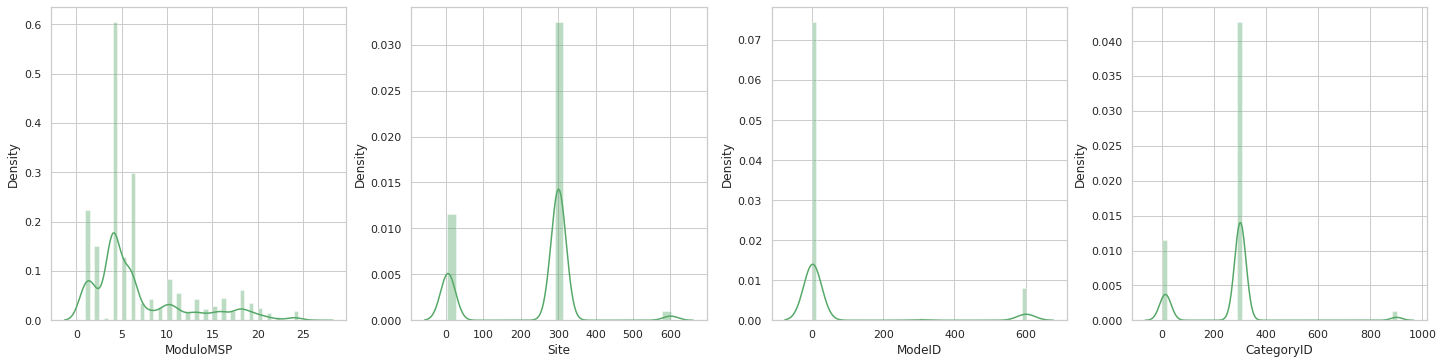

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,5))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [ ]:
y = df["TechID"]
print(y.shape)

(16818,)


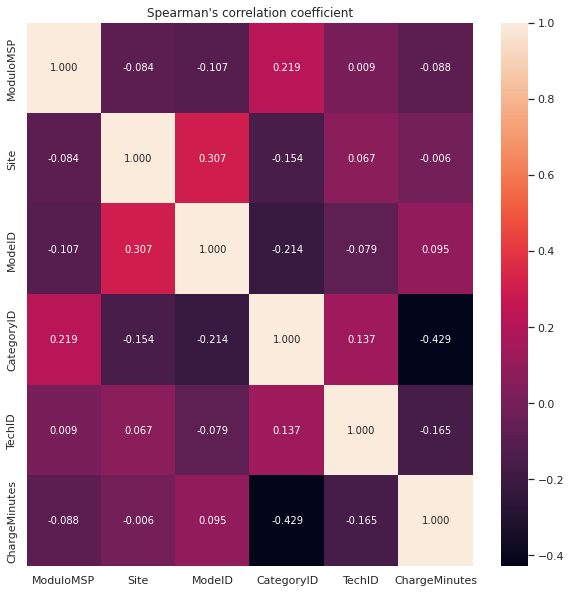

In [ ]:
corr_spearman = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 11772
y_train shape: 11772
X_test shape:5046
y_test shape:5046


### Clúster por vecinos más cercanos

In [ ]:
# Hiperparámetros
n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

param_grid = {"n_neighbors": n_neighbors, "weights": weights, "metric": metric}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier() #Genera el modelo
KNN.fit(X_train, y_train)   #Entrena el modelo
KNN_cv = RandomizedSearchCV(KNN, param_grid, cv = 5)
KNN_cv.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)   #Genera la predicción

In [ ]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.66
Precisión del modelo en el subconjunto de prueba: 0.63


In [ ]:
# Hiperparámetros que generan el mejor modelo
print("K vecinos más cercanos con hiperparámetros ajustados: {}".format(KNN_cv.best_params_))

K vecinos más cercanos con hiperparámetros ajustados: {'weights': 'distance', 'n_neighbors': 18, 'metric': 'minkowski'}


In [ ]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.67
Precisión del modelo en el subconjunto de prueba: 0.67


### Clasificador ingenuo de Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción

In [ ]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.55
Precisión del modelo en el subconjunto de prueba: 0.54


### Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train) #Entrena el modelo
y_pred_lr = LogisticRegression.predict(X_test) #Genera la predicción

In [ ]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(LogisticRegression.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.62
Precisión del modelo en el subconjunto de prueba: 0.62


### Maquina de Soporte Vectorial

In [ ]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train, y_train) #Entrena el modelo
y_pred_svc = SVC.predict(X_test) #Genera la predición

In [ ]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(SVC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(SVC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.62
Precisión del modelo en el subconjunto de prueba: 0.62


### Bosque aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train) #Entrena el modelo
y_pred_rfc = RFC.predict(X_test) #Genera la predicción


In [ ]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.7
Precisión del modelo en el subconjunto de prueba: 0.67


In [ ]:
# Hiperparámetros
n_estimators = [int(n) for n in np.linspace(100, 1000, 5)]
max_depth = [int(d) for d in np.linspace(10, 50, 2)]
max_features = ["sqrt", "log2"]
criterion = ["gini", "entropy"]

param_grid = {"n_estimators": n_estimators,
         "max_depth": max_depth,
        "max_features": max_features,
        "criterion": criterion}

In [ ]:
RFC_cv = RandomizedSearchCV(RFC, param_grid, cv = 5)
RFC_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Hiperparámetros que generan el mejor modelo
print("Bosque aleatorio con hiperparámetros ajustados: {}".format(RFC_cv.best_params_))

Bosque aleatorio con hiperparámetros ajustados: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(RFC_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(RFC_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.68
Precisión del modelo en el subconjunto de prueba: 0.67


### Red Neuronal Artificial

In [ ]:
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier()
ANN.fit(X_train, y_train)
y_pred_ann = ANN.predict(X_test)

In [ ]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.61
Precisión del modelo en el subconjunto de prueba: 0.61


In [ ]:
# Hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(10,30,10), (20,), (3,2,1)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}

# Instancia del modelo
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier()

In [ ]:
# Ajusta de hiperparámetros y entrenamiento
ANN_cv = RandomizedSearchCV(ANN, param_grid, cv = 5)
ANN_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                                         

In [ ]:
# Hiperparámetros que generan el mejor modelo
print("Bosque aleatorio con hiperparámetros ajustados: {}".format(ANN_cv.best_params_))

Bosque aleatorio con hiperparámetros ajustados: {'hidden_layer_sizes': (20,), 'alpha': 0.01, 'activation': 'logistic'}


In [ ]:
# Evaluación del modelo
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(ANN_cv.best_score_.round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(ANN_cv.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.62
Precisión del modelo en el subconjunto de prueba: 0.64
